In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
trainDF = pd.read_csv(r'C:\Users\Administrator\Desktop\DataTrained_project\Flipo_intership\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\train.csv')

In [10]:
trainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
trainDF.shape

(159571, 8)

In [12]:
testDF = pd.read_csv(r'C:\Users\Administrator\Desktop\DataTrained_project\Flipo_intership\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\test.csv')

In [13]:
testDF.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [14]:
testDF.shape

(153164, 2)

In [15]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [16]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [17]:
trainDF.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [18]:
testDF.isnull().sum()

id              0
comment_text    0
dtype: int64

In [19]:
for c in trainDF.drop(columns = ['id','comment_text'],axis=1):
        print(trainDF[c].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


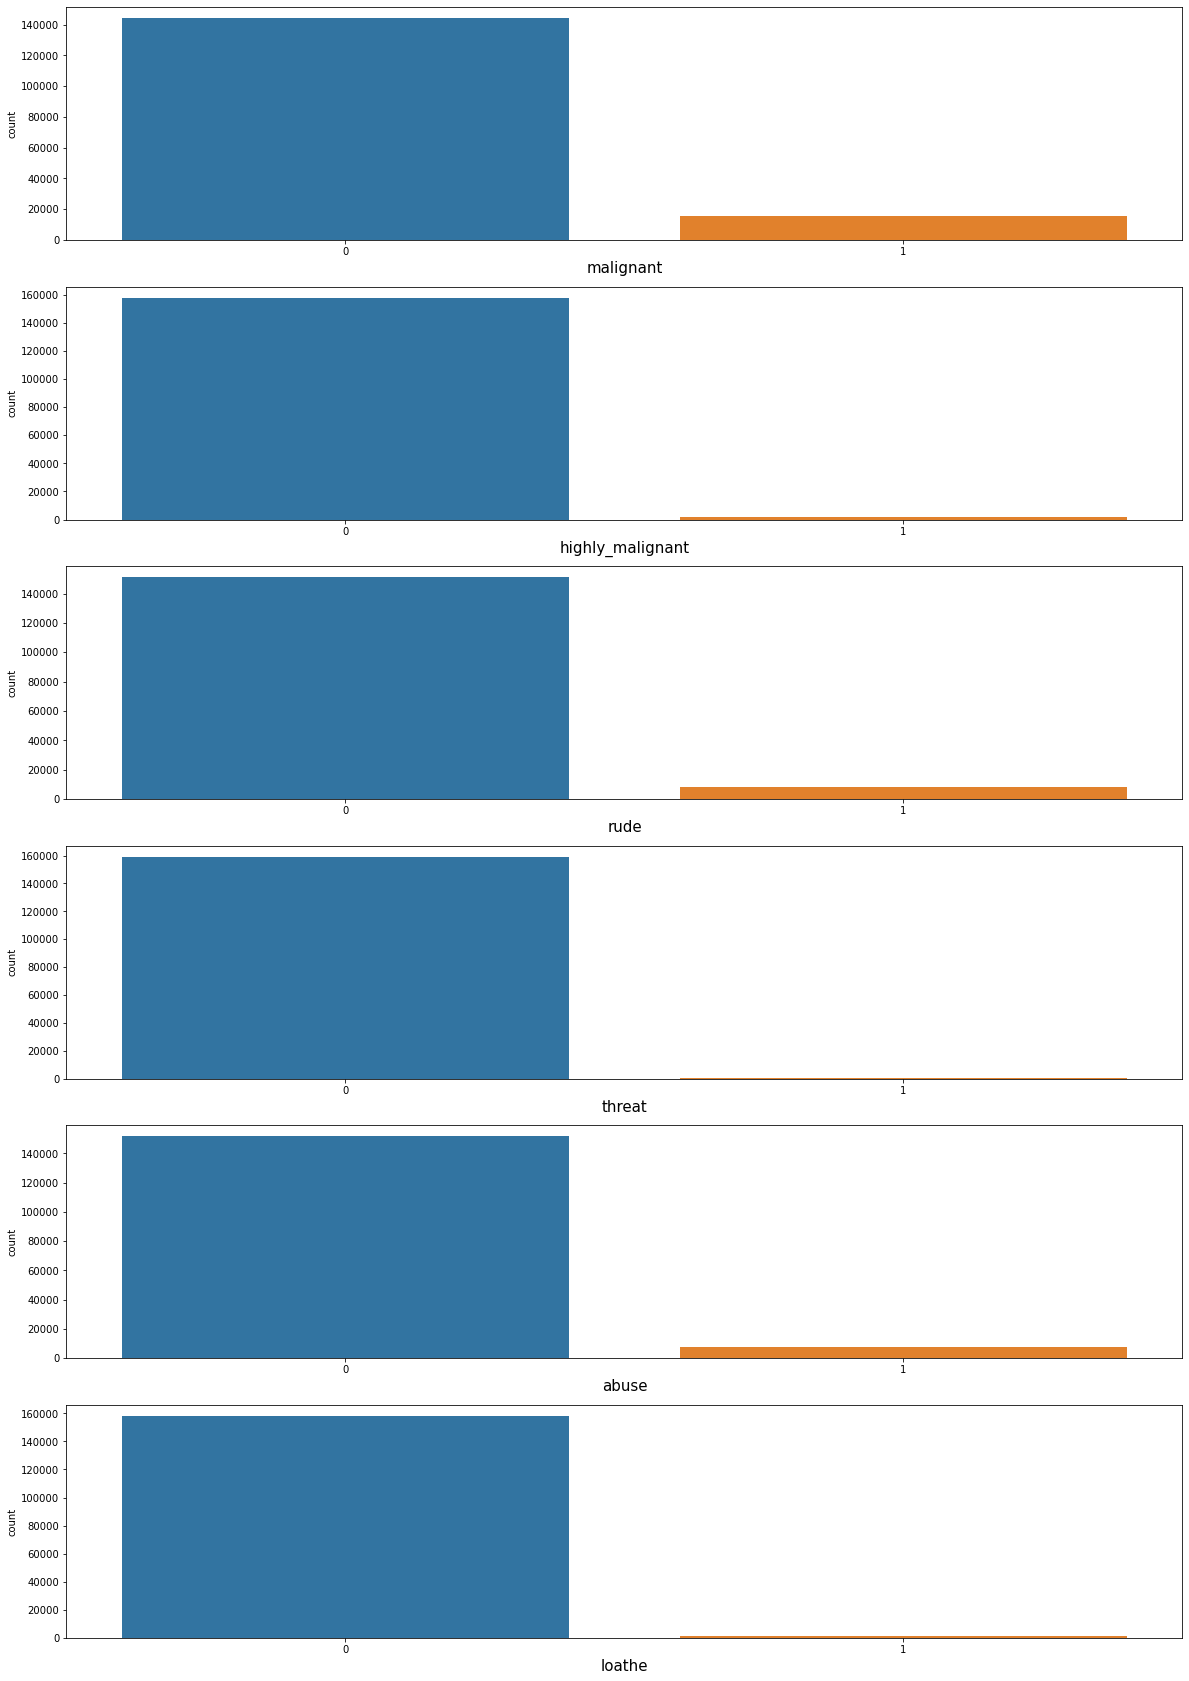

In [22]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in trainDF.drop(columns = ['id','comment_text'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(trainDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [23]:
trainDF['Stringlength'] = trainDF['comment_text'].str.len()
trainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

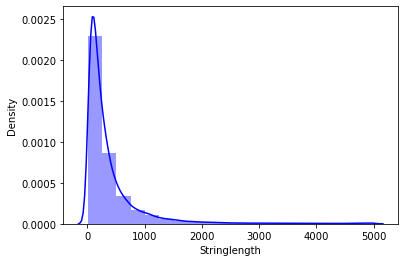

In [24]:
sns.distplot(trainDF.Stringlength, bins=20, color = 'blue')

In [25]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
trainDF.drop(columns='id',inplace = True)
testDF.drop(columns='id',inplace = True)

In [27]:
# Convert all messages to lower case
trainDF['comment_text'] = trainDF['comment_text'].str.lower()


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'[\_]',' ') #removing underscore characters

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^\s+|\s+?$', ' ')  #removing leading and trailing whitespace


In [28]:
trainDF.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour m seem...,0,0,0,0,0,0,112
2,hey man m really not trying to edit war it jus...,0,0,0,0,0,0,233
3,more can make any real suggestions on improve...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [36]:
m = trainDF.iloc[:,1:7].sum()

<AxesSubplot:title={'center':'Malignant comment types and their Counts'}>

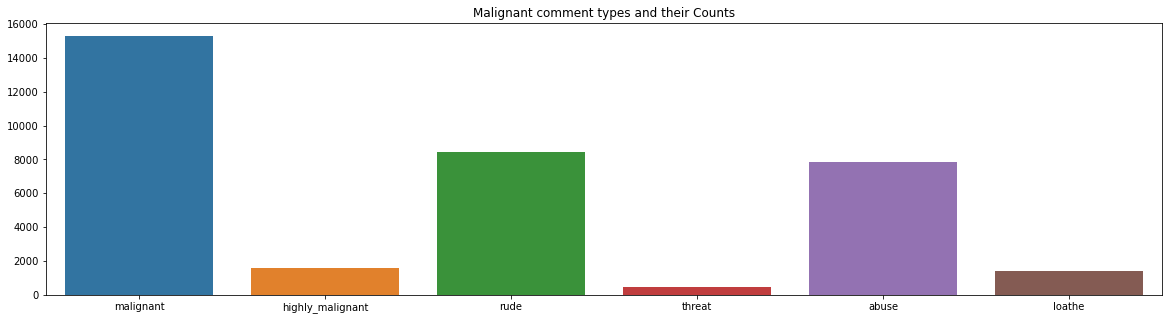

In [37]:
plt.figure(figsize=(20,5),facecolor='white')
plt.title("Malignant comment types and their Counts")
sns.barplot(m.index, m.values)

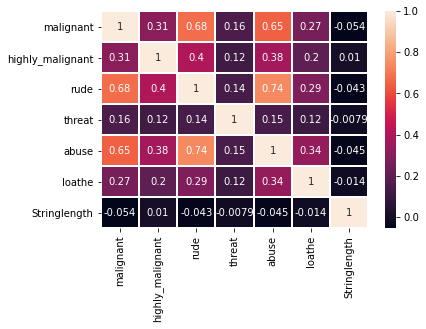

In [39]:
m_corr=trainDF.corr()
sns.heatmap(m_corr,annot=True,linewidth=1)
plt.show()

In [40]:
trainDF['comment_type'] = trainDF.iloc[:,1:7].sum(axis=1)

In [41]:
trainDF.comment_type.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: comment_type, dtype: int64

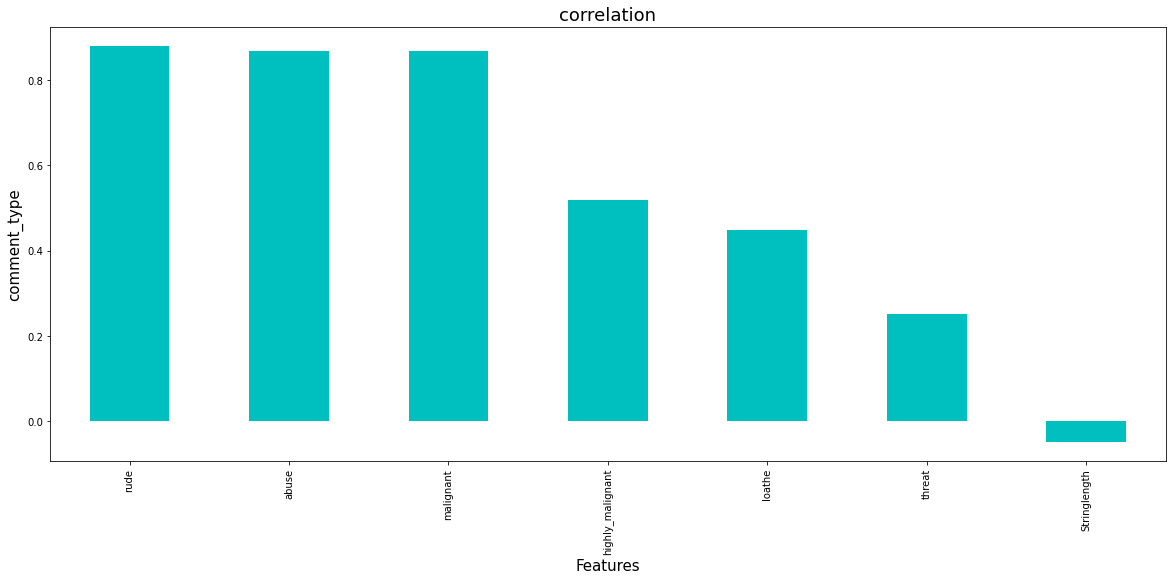

In [42]:
plt.figure(figsize = (20,8))
trainDF.corr()['comment_type'].sort_values(ascending = False).drop(['comment_type']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('comment_type',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()


In [44]:
trainDF['comment_type'] = np.where((trainDF['comment_type'] > 0), 1,0)

In [45]:
trainDF['comment_type'].value_counts()

0    143346
1     16225
Name: comment_type, dtype: int64

<AxesSubplot:xlabel='comment_type', ylabel='count'>

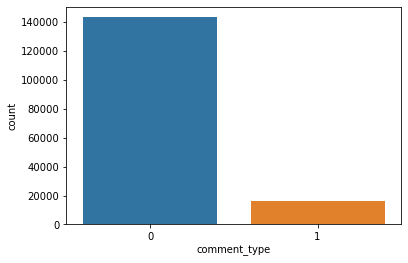

In [46]:
sns.countplot(trainDF['comment_type'])

In [47]:
print('Benign comment ratio = ',round(len(trainDF[trainDF['comment_type']==0])/len(trainDF.comment_type),2)*100,'%')

Benign comment ratio =  90.0 %


In [48]:
print('Malignant comment ratio = ',round(len(trainDF[trainDF['comment_type']==1])/len(trainDF.comment_type),2)*100,'%')

Malignant comment ratio =  10.0 %


In [49]:
from collections import Counter
ben = Counter(",".join(trainDF[trainDF['comment_type']==0]["comment_text"]).split()).most_common(10)
mal = Counter(",".join(trainDF[trainDF['comment_type']==1]["comment_text"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Malignant and Benign Words with their counts")
Countdf['Malignant Words']=mal
Countdf['Benign Words']=ben
Countdf.head(10)

TOP 10 Malignant and Benign Words with their counts


,Malignant Words,Benign Words
0,"(you, 39429)","(the, 471203)"
1,"(the, 22960)","(to, 279552)"
2,"(to, 17540)","(of, 212148)"
3,"(and, 17443)","(and, 205759)"
4,"(is, 13822)","(you, 175374)"
5,"(of, 12678)","(is, 162205)"
6,"(your, 9478)","(that, 150709)"
7,"(fuck, 9456)","(num, 139439)"
8,"(that, 9210)","(it, 137711)"
9,"(it, 8999)","(in, 137588)"


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')
features = tf_vec.fit_transform(trainDF['comment_text'])
X = features
y=trainDF['comment_type']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,hamming_loss,log_loss
from sklearn.model_selection import GridSearchCV

# Balancing out classes in Label column using SMOTE technique

In [52]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

In [53]:
from sklearn.naive_bayes import MultinomialNB
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  MultinomialNB()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9126360338573156 on random_state: 23


In [54]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 23)

In [56]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

In [57]:
RFC = RandomForestClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
pc= PassiveAggressiveClassifier()

In [58]:
RFC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [59]:
#Logistic Regression Model
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[39588,  3604],
       [ 2109, 40707]], dtype=int64)

In [78]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [60]:
loss = log_loss(y_test,LOGRpred)
print('Log loss : ', loss)

Log loss :  2.294239039313357


In [61]:
#Random Forest Classifier Model
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[42040,  1152],
       [  374, 42442]], dtype=int64)

In [77]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [62]:
loss = log_loss(y_test,RFCpred)
print('Log loss : ', loss)

Log loss :  0.6128161789004902


In [63]:
#Multinomial Naive Bayes Model
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)
conf_matrx = confusion_matrix(y_test,MNBpred)
conf_matrx

array([[39250,  3942],
       [ 3572, 39244]], dtype=int64)

In [76]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [64]:
loss = log_loss(y_test,MNBpred)
print('Log loss : ', loss)

Log loss :  3.0174811394803824


In [65]:
#Complement Naive Bayes Model Accuracy
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)
conf_matrx = confusion_matrix(y_test,CNBpred)
conf_matrx

array([[39285,  3907],
       [ 3681, 39135]], dtype=int64)

In [75]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [66]:
loss = log_loss(y_test,CNBpred)
print('Log loss : ', loss)

Log loss :  3.0471974620005358


In [67]:
#Passive Aggressive Classifier Model
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)
conf_matrx = confusion_matrix(y_test,pcpred)
conf_matrx

array([[39859,  3333],
       [  368, 42448]], dtype=int64)

In [74]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [68]:
loss = log_loss(y_test,pcpred)
print('Log loss : ', loss)

Log loss :  1.486264957862052


In [70]:
#AdaBoost Classifier Model
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[30072, 13120],
       [ 4509, 38307]], dtype=int64)

In [73]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.70      0.77     43192
           1       0.74      0.89      0.81     42816

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.79     86008
weighted avg       0.81      0.80      0.79     86008



In [72]:
loss = log_loss(y_test,adbcpred)
print('Log loss : ', loss)

Log loss :  7.079510973213708


# Model Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score as cvs

In [80]:
#Logistic Regression
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.9354813300805656


In [81]:
#Random Forest Classifier
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.9843176788557576


In [82]:
#Multinomial Naive Bayes
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

0.9110892590802914


In [83]:
#Complement Naive Bayes
print(cvs(CNB,smt_x,smt_y,cv=5).mean())

0.9110857710529452


In [84]:
#Passive Aggressive Classifier
print(cvs(pc,smt_x,smt_y,cv=5).mean())

0.9576863084732923


In [85]:
#Adaboost Classifier
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.7950309246583411


# Hyper Parameter Tuning

In [86]:
parameter = {'n_estimators':[50,100,300],'max_depth': [10,60],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 30],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [87]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
Best_mod = RandomForestClassifier(n_estimators = 300,criterion = 'gini', max_depth= 60, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

90.24625616221746


array([[37272,  5920],
       [ 2469, 40347]], dtype=int64)

In [89]:
parameter = {'penalty':['l1', 'l2'],'dual': [True,False],'C':[1,2,5,10],'fit_intercept':[True,False],'solver':['liblinear','saga','sag','newton-cg'],'max_iter':[100,200]}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose = 1)
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag', 'newton-cg']},
             verbose=1)

In [90]:
GridCV.best_params_

{'C': 10,
 'dual': False,
 'fit_intercept': False,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [91]:
Best_mod2 = LogisticRegression(penalty = 'l1',dual = False,fit_intercept=False,C=10,solver='liblinear',max_iter=100)
Best_mod2.fit(x_train,y_train)
LRpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,LRpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,LRpred)
conf_matrx

96.20616686819831


array([[40543,  2649],
       [  614, 42202]], dtype=int64)

In [92]:
accu = classification_report(y_test,LRpred)
print(accu)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     43192
           1       0.94      0.99      0.96     42816

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008



In [93]:
parameter = {'C':[1,2,5,10],'fit_intercept':[True,False],'early_stopping':[True,False],'validation_fraction':[0.001,0.1],'tol':[0.001,0.01,0.1,1.0],'n_iter_no_change':[5,10],'max_iter':[1000,1500,2000,5000]}
GridCV = GridSearchCV(PassiveAggressiveClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'early_stopping': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 1500, 2000, 5000],
                         'n_iter_no_change': [5, 10],
                         'tol': [0.001, 0.01, 0.1, 1.0],
                         'validation_fraction': [0.001, 0.1]},
             verbose=1)

In [94]:
GridCV.best_params_

{'C': 1,
 'early_stopping': False,
 'fit_intercept': False,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'tol': 0.01,
 'validation_fraction': 0.001}

In [95]:
Best_mod5 = PassiveAggressiveClassifier(C=1,early_stopping=False,fit_intercept=False,max_iter=1000,n_iter_no_change=10,tol=0.01,validation_fraction=0.001)
Best_mod5.fit(x_train,y_train)
pcpred = Best_mod5.predict(x_test)
acc = accuracy_score(y_test,pcpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,pcpred)
conf_matrx

95.64575388335969


array([[40025,  3167],
       [  578, 42238]], dtype=int64)

# After Tuning the hyper parameters it is found that Logistic Regression model performs the best

# Saving The Model

In [96]:
import joblib
joblib.dump(Best_mod2,"BestModelMalignantClassifier.pkl")

['BestModelMalignantClassifier.pkl']